In [38]:
class argsclass():
    pass
args = argsclass()

args.experiment_name='ResNet_batch_16_samples_5_in_5_out_1_lr_0.001_2' 
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True
args.num_workers = 4
args.batch_size = 16

In [39]:
import math
import seaborn as sns
from utils.plotting import imshow
from utils.experiment_evaluator import get_test_predictions_pairs, save_sequence_plots

def show_prediction_plot(title, predicted, target, normalize):
    # -1 means print last frame
    # predicted = predicted[image_to_plot, -1:, :, :].cpu()
    # target = target[image_to_plot, -1:, :, :].cpu()
    fig = plt.figure(figsize=(6, 6))
    sns.set(style="white")  # darkgrid, whitegrid, dark, white, and ticks
    sns.set_context("talk")
    pred = fig.add_subplot(1, 2, 1)
    imshow(predicted, title="Predicted", smoothen=True, obj=pred, normalize=normalize)
    tar = fig.add_subplot(1, 2, 2)
    imshow(target, title="Target", obj=tar, normalize=normalize)
    fig.suptitle(title)
    plt.show()
    plt.close()

In [40]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils.arg_extract import get_args
from utils.experiment_evaluator import Evaluator, get_sample_predictions
from utils.experiment import Experiment

plt.ioff()
logging.basicConfig(format='%(message)s', level=logging.INFO)

# args = get_args()

experiment = Experiment(args)
experiment.load_from_disk(test=True)
evaluator = Evaluator(args.test_starting_point, experiment.normalizer,)

model = experiment.model
dataloader = experiment.dataloaders['test']
device = experiment.device
normalizer = experiment.normalizer
debug = args.debug

Experiment ResNet_batch_16_samples_5_in_5_out_1_lr_0.001_2
Creating directories
use CPU
Loading datasets
Loading model /Users/stathis/Code/thesis/wave_propagation/experiments_results/ResNet_batch_16_samples_5_in_5_out_1_lr_0.001_2/models/model_best.pt


In [41]:
batch_images = next(iter(dataloader))

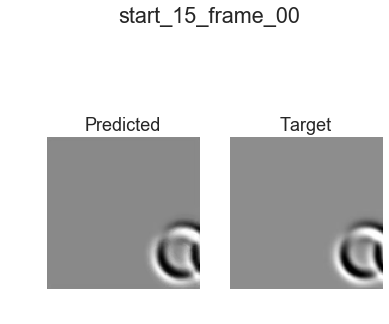

0.09256302520415385


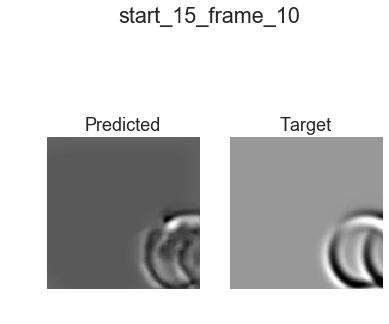

1.0851393990640958


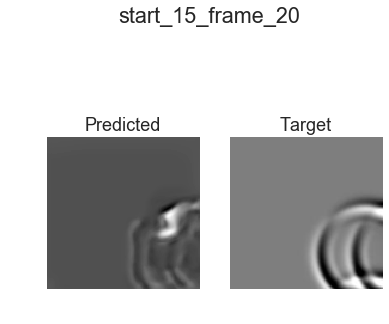

2.0030502601949727


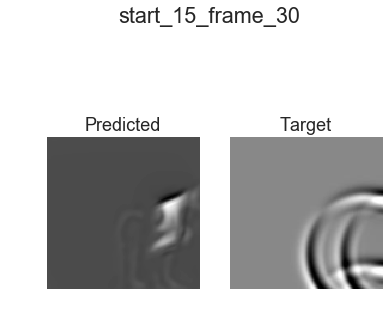

7.70794734457446


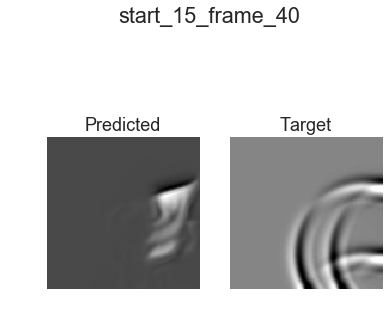

30.43285074184842


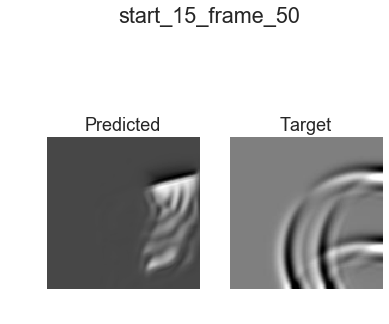

96.78076691309946


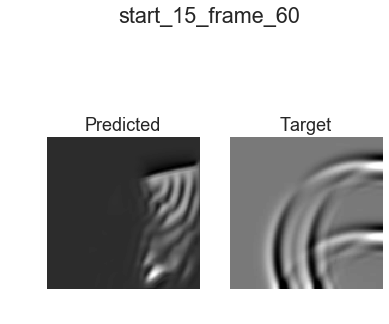

309.41784670763377


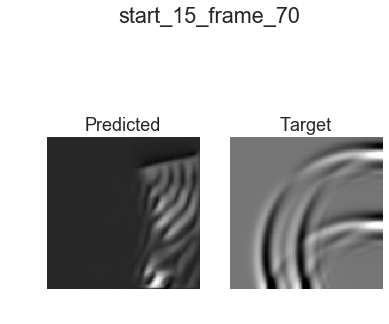

1120.0939310583542


In [42]:
from skimage import measure
num_input_frames = model.get_num_input_frames()
num_output_frames = model.get_num_output_frames()
num_total_frames = batch_images.size(1)
batch_images = batch_images.to(device)

starting_point = 15
num_total_output_frames = 80
output_frames, target_frames = get_test_predictions_pairs(model, batch_images, starting_point, num_total_output_frames)

num_real_total_frames = output_frames.size(1)
for frame_index in range(0, num_real_total_frames, 10):
    title = 'start_%02d_frame_%02d' % (starting_point, frame_index)
    output = output_frames[0, frame_index, :, :].cpu().numpy()
    target = target_frames[0, frame_index, :, :].cpu().numpy()
    show_prediction_plot(title, output, target, normalizer)
    print(np.sqrt(measure.compare_mse(output, target)))